# Sample APP demonstration

**Details:**
    
    - python package: pyspark
    - Language model: Word2Vec (all errors)
    - Clustering algorithm: K-Means
    
**Mode:**

    - Word2Vec: training
    - K-Means: training (K optimized)

### Imports
Import libraries and write settings here.

In [1]:
%load_ext autoreload
%autoreload 2

from opint_framework.apps.example_app.nlp.pyspark_based.pyspark_nlp_adapter import pysparkNLPAdapter
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Analysis/Modeling
Do work here

## Instantiate NLPAdapter object

In [2]:
# setup sample data path
#data_path = """/home/luca/PycharmProjects/opint-framework/opint_framework/apps/example_app/nlp/pyspark_based/sample_data/sample_data_5mar20.json"""
# data_path = """/home/luca/PycharmProjects/opint-framework/opint_framework/apps/example_app/nlp/pyspark_based/sample_data/test_data_raw.json"""
data_path = """/home/luca/PycharmProjects/opint-framework/opint_framework/apps/example_app/nlp/pyspark_based/sample_data/fts_20oct2020.json"""

# instantiate NLPAdapter object
pipeline = pysparkNLPAdapter(path_list=[data_path], vo="atlas", filter_T3=True,  # data
                             tks_col="stop_token_1",  # tokenization
                             w2v_model_path="results/w2v", w2v_mode="train", w2v_save_mode="overwrite",
                             emb_size=3, win_size=8, min_count=1, tks_vec="message_vector",  # word2vec
                             ft_col="features", kmeans_model_path="results/kmeans", kmeans_mode="train",
                             pred_mode="static", new_cluster_thresh=None, k_list=[2, 4],
                             distance="cosine", opt_initSteps=10, opt_tol=0.01, opt_maxIter=10,
                             log_path=None, n_cores=4,  # K_optim
                             tr_initSteps=30, tr_tol=0.001, tr_maxIter=30,  # train_kmeans
                             clust_col="prediction", wrdcld=True, timeplot=True)

## Pre-processing 

In [3]:
pipeline.pre_process()

In [4]:
print("dataset type:", type(pipeline.context['dataset']))
print("dataset columns:", pipeline.context['dataset'].columns)
print("dataset entries:", pipeline.context['dataset'].count())

print("\nHead:\n")
pipeline.context['dataset'].toPandas().set_index(pipeline.context["id_col"]).head()

dataset type: <class 'pyspark.sql.dataframe.DataFrame'>
dataset columns: ['tr_id', 't__error_message', 'src_hostname', 'dst_hostname', 'tr_datetime_complete', 'src_level', 'dst_level']
dataset entries: 996

Head:



,t__error_message,src_hostname,dst_hostname,tr_datetime_complete,src_level,dst_level
tr_id,,,,,,
2020-10-20-2052__grid-dav.rzg.mpg.de__fal-pygrid-30.lancs.ac.uk__1804077215__b9a30da8-1315-11eb-84f1-fa163e564087,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: copy HTTP 403 : Permission refused",grid-dav.rzg.mpg.de,fal-pygrid-30.lancs.ac.uk,2020-10-20 20:52:00,T2,T2
2020-10-20-2021__head01.aglt2.org__gridftp.nese.mghpcc.org__655616124__c0e9be0a-130f-11eb-ba8f-b49691292ed8,TRANSFER Operation timed out,head01.aglt2.org,gridftp.nese.mghpcc.org,2020-10-20 20:21:00,T2,T2
2020-10-20-2053__atlaswebdav-kit.gridka.de__fal-pygrid-30.lancs.ac.uk__1804077469__bfb9b278-1315-11eb-942b-fa163e5a6d18,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: copy HTTP 403 : Permission refused",atlaswebdav-kit.gridka.de,fal-pygrid-30.lancs.ac.uk,2020-10-20 20:53:00,T1,T2
2020-10-20-2053__atlas-gridftp.bu.edu__t2se01.physics.ox.ac.uk__1804075477__bca8bbf3-4d64-5416-b075-8cc2333962fe,Operation timed out,atlas-gridftp.bu.edu,t2se01.physics.ox.ac.uk,2020-10-20 20:53:00,T2,T2
2020-10-20-2053__atlas-gridftp.bu.edu__t2se01.physics.ox.ac.uk__1804074461__67cdd260-1315-11eb-891a-fa163e564087,Operation timed out,atlas-gridftp.bu.edu,t2se01.physics.ox.ac.uk,2020-10-20 20:53:00,T2,T2


## Run 

In [5]:
!rm -r results

In [6]:
kmeans_model = pipeline.run()


Training Word2Vec model
 ------------------------------------------------------------ 

Saving w2v model to: results/w2v/w2v_sample_app_example_VS=3_MC=1_WS=8

Selecting best number of clusters
 ------------------------------------------------------------ 

With K=4

Started at: 2020-11-27 14:48:06

Within Cluster Sum of Squared Errors = 67.4578
Silhouette with cosine distance = 0.6248

Time elapsed: 0 minutes and 2 seconds.
------------------------------------------------------------
With K=2

Started at: 2020-11-27 14:48:06

Within Cluster Sum of Squared Errors = 122.6131
Silhouette with cosine distance = 0.8347

Time elapsed: 0 minutes and 2 seconds.
------------------------------------------------------------

Training K-Means model for best value of K
 ------------------------------------------------------------ 

With K=2

Started at: 2020-11-27 14:48:09

Within Cluster Sum of Squared Errors = 120.2504
Silhouette with cosine distance = 0.8347

Time elapsed: 0 minutes and 2 secon

In [7]:
print("kmeans_model type:", type(kmeans_model))
print("kmeans_model keys:", kmeans_model.keys())

kmeans_model

kmeans_model type: <class 'dict'>
kmeans_model keys: dict_keys(['model', 'wsse', 'asw'])


{'model': KMeans_af0816402ed3,
 'wsse': 120.25038104565122,
 'asw': 0.83465866210025}

In [8]:
kmeans_model["model"].summary.predictions.columns

['tr_id',
 't__error_message',
 'corrected_message',
 'tokens',
 'tokens_cleaned',
 'stop_token',
 'stop_token_1',
 'message_vector',
 'features',
 'prediction']

In [9]:
print("Optimal number of clusters:", kmeans_model["model"].summary.k)
print("\nRaw predictions dataset:")

kmeans_model["model"].summary.predictions.toPandas().set_index(pipeline.context["id_col"]).head()

Optimal number of clusters: 2

Raw predictions dataset:


,t__error_message,corrected_message,tokens,tokens_cleaned,stop_token,stop_token_1,message_vector,features,prediction
tr_id,,,,,,,,,
2020-10-20-2052__grid-dav.rzg.mpg.de__fal-pygrid-30.lancs.ac.uk__1804077215__b9a30da8-1315-11eb-84f1-fa163e564087,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: copy HTTP 403 : Permission refused","TRANSFER error: Copy failed with mode 3rd pull, with error: copy HTTP 403 : Permission refused","[transfer, error:, copy, failed, with, mode, 3rd, pull,, with, error:, copy, http, 403, :, permission, refused]","[transfer, error, copy, failed, with, mode, 3rd, pull, with, error, copy, http, 403, , permission, refused]","[transfer, error, copy, failed, mode, 3rd, pull, error, copy, http, 403, , permission, refused]","[transfer, error, copy, failed, mode, 3rd, pull, error, copy, http, 403, permission, refused]","[3.616787335047355, 0.6886752866781676, -1.872978958946008]","[3.616787335047355, 0.6886752866781676, -1.872978958946008]",0
2020-10-20-2021__head01.aglt2.org__gridftp.nese.mghpcc.org__655616124__c0e9be0a-130f-11eb-ba8f-b49691292ed8,TRANSFER Operation timed out,TRANSFER Operation timed out,"[transfer, operation, timed, out]","[transfer, operation, timed, out]","[transfer, operation, timed]","[transfer, operation, timed]","[-1.2871490319569905, -3.3957945803801217, 0.9067541360855103]","[-1.2871490319569905, -3.3957945803801217, 0.9067541360855103]",1
2020-10-20-2053__atlaswebdav-kit.gridka.de__fal-pygrid-30.lancs.ac.uk__1804077469__bfb9b278-1315-11eb-942b-fa163e5a6d18,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: copy HTTP 403 : Permission refused","TRANSFER error: Copy failed with mode 3rd pull, with error: copy HTTP 403 : Permission refused","[transfer, error:, copy, failed, with, mode, 3rd, pull,, with, error:, copy, http, 403, :, permission, refused]","[transfer, error, copy, failed, with, mode, 3rd, pull, with, error, copy, http, 403, , permission, refused]","[transfer, error, copy, failed, mode, 3rd, pull, error, copy, http, 403, , permission, refused]","[transfer, error, copy, failed, mode, 3rd, pull, error, copy, http, 403, permission, refused]","[3.616787335047355, 0.6886752866781676, -1.872978958946008]","[3.616787335047355, 0.6886752866781676, -1.872978958946008]",0
2020-10-20-2053__atlas-gridftp.bu.edu__t2se01.physics.ox.ac.uk__1804075477__bca8bbf3-4d64-5416-b075-8cc2333962fe,Operation timed out,Operation timed out,"[operation, timed, out]","[operation, timed, out]","[operation, timed]","[operation, timed]","[-3.4313461780548096, -5.224326312541962, 2.0150126218795776]","[-3.4313461780548096, -5.224326312541962, 2.0150126218795776]",1
2020-10-20-2053__atlas-gridftp.bu.edu__t2se01.physics.ox.ac.uk__1804074461__67cdd260-1315-11eb-891a-fa163e564087,Operation timed out,Operation timed out,"[operation, timed, out]","[operation, timed, out]","[operation, timed]","[operation, timed]","[-3.4313461780548096, -5.224326312541962, 2.0150126218795776]","[-3.4313461780548096, -5.224326312541962, 2.0150126218795776]",1


# Results
Show graphs and stats here

## Post-processing

Saving time plots to: results/kmeans/plot/timeplot
Saving time plots data to HDFS: results/kmeans/plot/timeplot/cluster_0


/home/luca/anaconda3/envs/opint_framework/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/luca/anaconda3/envs/opint_framework/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Saving time plots data to HDFS: results/kmeans/plot/timeplot/cluster_1
Saving tokens cloud to: results/kmeans/plots/tokens_clouds
Saving raw prediction dataset to HDFS: results/kmeans/2020/11/27/raw
Saving msg aggregate summary to HDFS: results/kmeans/2020/11/27/aggregate/msg_aggregate_summary
Saving src aggregate summary to HDFS: results/kmeans/2020/11/27/aggregate/src_aggregate_summary
Saving dst aggregate summary to HDFS: results/kmeans/2020/11/27/aggregate/dst_aggregate_summary
Saving clustering summary to HDFS: results/kmeans/2020/11/27/aggregate/summary


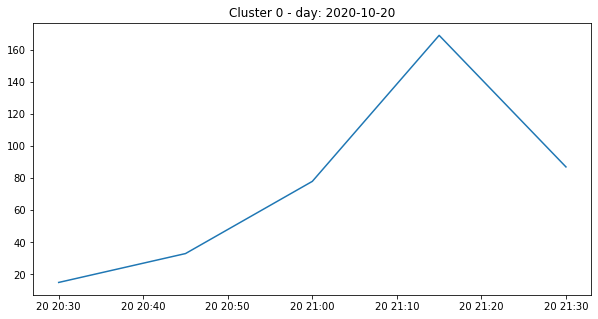

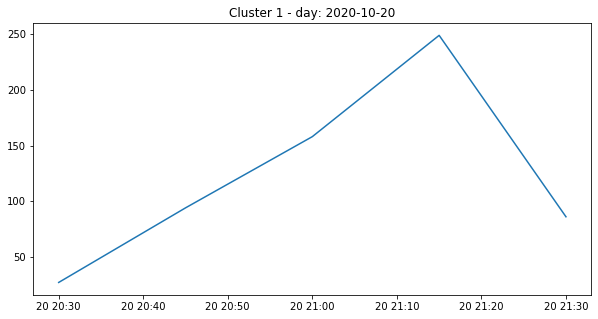

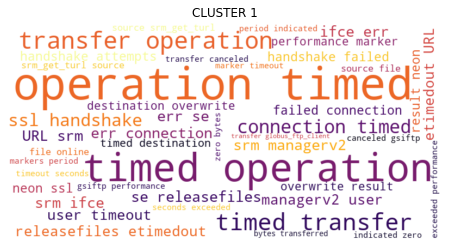

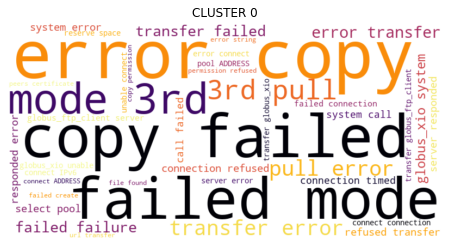

In [10]:
summary_table = pipeline.post_process(kmeans_model)

In [11]:
summary_table

clust_UUID  n_messages  \
prediction rank_pattern                                                     
1          1             35b3c231-4930-49e8-aadd-33282ed7810a         614   
           2             35b3c231-4930-49e8-aadd-33282ed7810a         614   
           3             35b3c231-4930-49e8-aadd-33282ed7810a         614   
           4             35b3c231-4930-49e8-aadd-33282ed7810a         614   
           5             35b3c231-4930-49e8-aadd-33282ed7810a         614   
...                                                       ...         ...   
0          76            6ebab4da-bfa0-4715-bd91-cae6b51a9884         382   
           77            6ebab4da-bfa0-4715-bd91-cae6b51a9884         382   
           78            6ebab4da-bfa0-4715-bd91-cae6b51a9884         382   
           79            6ebab4da-bfa0-4715-bd91-cae6b51a9884         382   
           80            6ebab4da-bfa0-4715-bd91-cae6b51a9884         382   

                         unique_strings  unique_patterns  \
prediction rank_pattern                                    
1          1                         13               13   
           2                         13               13   
           3                         13               13   
           4                         13               13   
           5                         13               13   
...                                 ...              ...   
0          76                       137               75   
           77                       137               75   
           78                       137               75   
           79                       137               75   
           80                       137               75   

                                                                                                                                     pattern  \
prediction rank_pattern                                                                                                                        
1          1                                                                                                             operation timed out   
           2                                                                                                    transfer operation timed out   
           3                      srm-ifce err connection timed out err [se][releasefiles][etimedout] \$URL /srm/managerv2 user timeout over   
           4             destination overwrite result (neon) ssl handshake failed connection timed out during ssl handshake after 1 attempts   
           5                                                                               source srm_get_turl the source file is not online   
...                                                                                                                                      ...   
0          76                                                                                                                           None   
           77                                                                                                                           None   
           78                                                                                                                           None   
           79                                                                                                                           None   
           80                                                                                                                           None   

                         n_patterns  msg_perc                src_hostname  \
prediction rank_pattern                                                     
1          1                  433.0  0.705212        atlas-gridftp.bu.edu   
           2                   91.0  0.148208     gridftp.nese.mghpcc.org   
           3                   28.0  0.045603    storm-fe.cr.cnaf.infn.it   
          

## All in one step 

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



NLP Adapter - PySpark_adapter: Pre Processing input data

NLP Adapter - PySpark_adapter: Executing vectorization, tokenization and clusterization

Training Word2Vec model
 ------------------------------------------------------------ 

Saving w2v model to: results/w2v/w2v_sample_app_example_VS=3_MC=1_WS=8

Selecting best number of clusters
 ------------------------------------------------------------ 

With K=4

Started at: 2020-11-27 14:59:42

Within Cluster Sum of Squared Errors = 61.1956
Silhouette with cosine distance = 0.6797

Time elapsed: 0 minutes and 1 seconds.
------------------------------------------------------------
With K=2

Started at: 2020-11-27 14:59:42

Within Cluster Sum of Squared Errors = 134.9089
Silhouette with cosine distance = 0.798

Time elapsed: 0 minutes and 1 seconds.
------------------------------------------------------------

Training K-Means model for best value of K
 ------------------------------------------------------------ 

With K=2

Started at: 

/home/luca/anaconda3/envs/opint_framework/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/luca/anaconda3/envs/opint_framework/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Saving time plots data to HDFS: results/kmeans/plot/timeplot/cluster_1
Saving tokens cloud to: results/kmeans/plots/tokens_clouds
Saving raw prediction dataset to HDFS: results/kmeans/2020/11/27/raw
Saving msg aggregate summary to HDFS: results/kmeans/2020/11/27/aggregate/msg_aggregate_summary
Saving src aggregate summary to HDFS: results/kmeans/2020/11/27/aggregate/src_aggregate_summary
Saving dst aggregate summary to HDFS: results/kmeans/2020/11/27/aggregate/dst_aggregate_summary
Saving clustering summary to HDFS: results/kmeans/2020/11/27/aggregate/summary


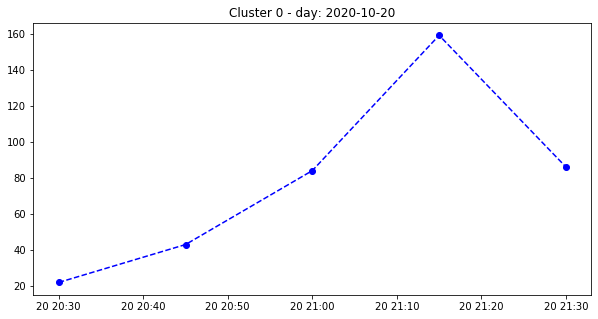

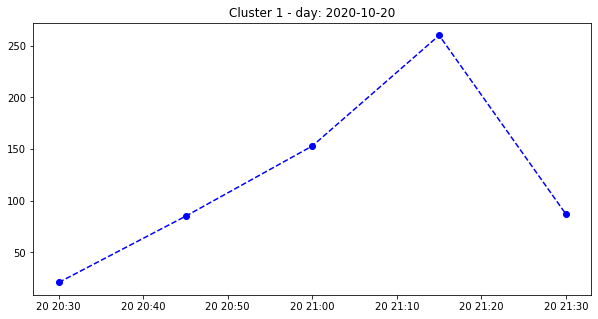

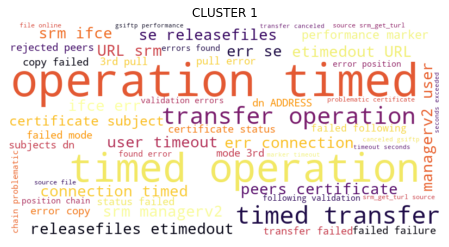

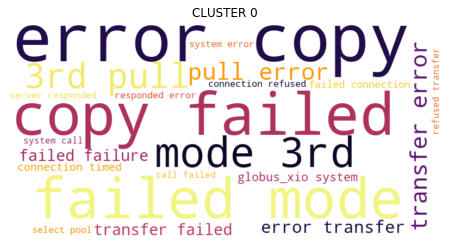

In [15]:
!rm -r results

# imports  and settings
from opint_framework.apps.example_app.nlp.pyspark_based.pyspark_nlp_adapter import pysparkNLPAdapter
import pandas as pd
pd.set_option('display.max_colwidth', None)

# setup sample data path
#data_path = """/home/luca/PycharmProjects/opint-framework/opint_framework/apps/example_app/nlp/pyspark_based/sample_data/sample_data_5mar20.json"""
# data_path = """/home/luca/PycharmProjects/opint-framework/opint_framework/apps/example_app/nlp/pyspark_based/sample_data/test_data.json"""
# data_path = """/home/luca/PycharmProjects/opint-framework/opint_framework/apps/example_app/nlp/pyspark_based/sample_data/test_data_raw.json"""
data_path = """/home/luca/PycharmProjects/opint-framework/opint_framework/apps/example_app/nlp/pyspark_based/sample_data/fts_20oct2020.json"""

# instantiate NLPAdapter object
pipeline = pysparkNLPAdapter(path_list=[data_path], vo=None,  # data
                          tks_col="stop_token_1",  # tokenization
                          w2v_model_path="results/w2v", w2v_mode="train", w2v_save_mode="overwrite", 
                          emb_size=3, win_size=8, min_count=1, tks_vec="message_vector",  # word2vec
                          ft_col="features", kmeans_model_path="results/kmeans", kmeans_mode="train",
                          pred_mode="static", new_cluster_thresh=None, k_list=[2,4],
                          distance="cosine", opt_initSteps=10, opt_tol=0.01, opt_maxIter=10, 
                          log_path=None, n_cores=4, # K_optim
                          tr_initSteps=30, tr_tol=0.001, tr_maxIter=30,  # train_kmeans
                          clust_col="prediction", wrdcld=True, timeplot=True)

# get results
summary_table = pipeline.execute()

In [14]:
summary_table

clust_UUID  n_messages  \
prediction rank_pattern                                                     
1          1             1272d31a-e07a-4b3e-aa17-bf3eb5840ef8         562   
           2             1272d31a-e07a-4b3e-aa17-bf3eb5840ef8         562   
           3             1272d31a-e07a-4b3e-aa17-bf3eb5840ef8         562   
           4             1272d31a-e07a-4b3e-aa17-bf3eb5840ef8         562   
           5             1272d31a-e07a-4b3e-aa17-bf3eb5840ef8         562   
...                                                       ...         ...   
3          6             5f59c4bc-d661-4279-b9f7-1e4d98e7fff1          36   
           7             5f59c4bc-d661-4279-b9f7-1e4d98e7fff1          36   
           8             5f59c4bc-d661-4279-b9f7-1e4d98e7fff1          36   
           9             5f59c4bc-d661-4279-b9f7-1e4d98e7fff1          36   
           10            5f59c4bc-d661-4279-b9f7-1e4d98e7fff1          36   

                         unique_strings  unique_patterns  \
prediction rank_pattern                                    
1          1                          8                8   
           2                          8                8   
           3                          8                8   
           4                          8                8   
           5                          8                8   
...                                 ...              ...   
3          6                          4                4   
           7                          4                4   
           8                          4                4   
           9                          4                4   
           10                         4                4   

                                                                                                                                                                                                          pattern  \
prediction rank_pattern                                                                                                                                                                                             
1          1                                                                                                                                                                                  operation timed out   
           2                                                                                                                                                                         transfer operation timed out   
           3                                                                                                                                                    source srm_get_turl the source file is not online   
           4             transfer transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded or all performance markers during that period indicated zero bytes transferred   
           5                                                           transfer globus_ftp_client the server responded with an error 555 srm upload aborted changing file state because request state has changed   
...                                                                                                                                                                                                           ...   
3          6                                                                                                                                                                                                 None   
           7                                                                                                                                                                                                 None   
           8                                                                                                                              